In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os, sys

def append_to_path(dir0): # A convenience function
    if dir0 not in sys.path:
        sys.path.append(dir0)

append_to_path(os.getcwd()+'/..')
import spikeinterface as si

append_to_path(os.getcwd()+'/../../spike-collab/widgets/timeserieswidget/')
from timeserieswidget import TimeseriesWidget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/alessiob/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
dataset_directory = '/home/alessiob/Documents/Codes/MEArec/recordings/recordings_20cells_Neuropixels-128_10.0_10.0uV_28-09-2018:15:39'

A = si.MEArecInputExtractor(recording_folder=dataset_directory)

B = si.MEArecOutputExtractor(recording_folder=dataset_directory)

In [4]:
print("Number of recording channels: %d" %A.getNumChannels())
print("Number of frames recorded: %d" %A.getNumFrames())
print("Sampling frequency: %f" %A.getSamplingFrequency())
print("Info channel 0:", A.getChannelInfo(0))
print("Number of units = "+str(len(B.getUnitIds())))

Loading recordings from folder...
Done loading recordings...
Number of recording channels: 128
Number of frames recorded: 320000
Sampling frequency: 32000.000000
Info channel 0: {'location': array([   0.,  -24., -630.])}
None
Loading recordings from folder...
Done loading recordings...
Number of units = 20


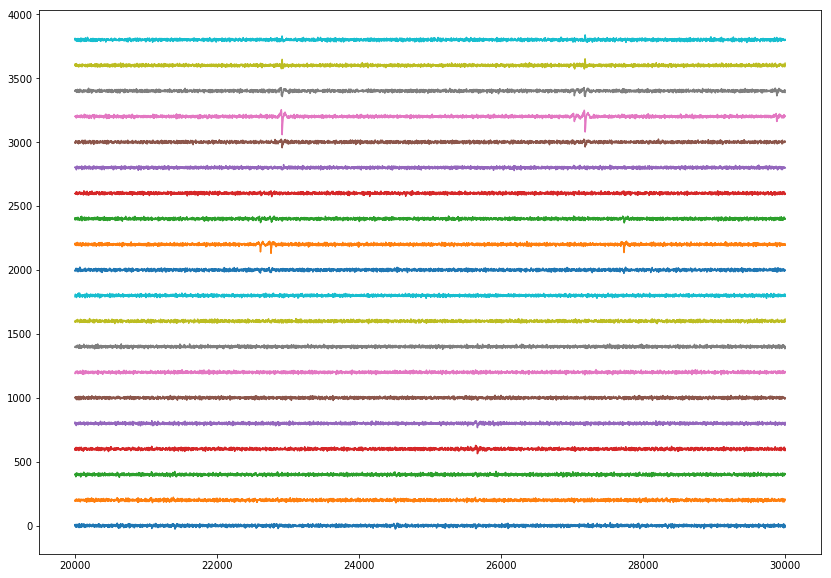

In [5]:
t0,t1 = 20000,30000
raw = A.getRawTraces(t0,t1,range(20))
plt.figure(figsize=(14,0.5*raw.shape[0]))
for i in range(raw.shape[0]):
    plt.plot(np.arange(t0,t1),raw[i]+i*200)

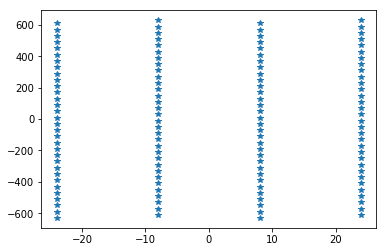

In [29]:
electrode_locations = np.array([A.getChannelInfo(id)['location'] for id in range(A.getNumChannels())])
electrode_locations.shape
plt.plot(electrode_locations[:,1], electrode_locations[:,2], '*')
